## Polynomial
In Machine Learning, the polynomial input matrix looks like this:
$$\phi=\begin{bmatrix}1 & x^{(1)}&(x^{(1)})^{2}\dots (x^{(1)})^{K-1}\\1 & x^{(2)}&(x^{(2)})^{2}\dots (x^{(2)})^{K-1} \\ \vdots \\1 & x^{(N)}&(x^{(N)})^{2}\dots (x^{(N)})^{K-1}\end{bmatrix}$$.

Let's say we want to fit the input features into a polynomial function with highest order of three:
1. We firsr create y and x


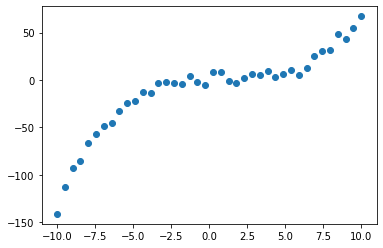

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(100)
x = np.linspace(-10, 10, 40).reshape(40, 1)
y = (0.1 * x ** 3 - 0.3 * x ** 2 + 0.3 * x + 0.4 + np.random.randn(40, 1) * 5)
plt.scatter(x,y)
plt.show()

Here is what the basic x-y graph looks like, based on the previous equation, now we need to expand the input features.


In [2]:
## get the number of samples in x
m=len(x)
## the highest order of the polynomial function
n=3

X=x**3
for i in range(n-1):
    print(i)
    X = np.hstack((X, x ** (n - i-1)))
X

0
1


array([[-1.00000000e+03,  1.00000000e+02, -1.00000000e+01],
       [-8.53908528e+02,  9.00065746e+01, -9.48717949e+00],
       [-7.22786965e+02,  8.05391190e+01, -8.97435897e+00],
       [-6.05826127e+02,  7.15976331e+01, -8.46153846e+00],
       [-5.02216828e+02,  6.31821170e+01, -7.94871795e+00],
       [-4.11149885e+02,  5.52925707e+01, -7.43589744e+00],
       [-3.31816113e+02,  4.79289941e+01, -6.92307692e+00],
       [-2.63406328e+02,  4.10913872e+01, -6.41025641e+00],
       [-2.05111347e+02,  3.47797502e+01, -5.89743590e+00],
       [-1.56121985e+02,  2.89940828e+01, -5.38461538e+00],
       [-1.15629056e+02,  2.37343853e+01, -4.87179487e+00],
       [-8.28233787e+01,  1.90006575e+01, -4.35897436e+00],
       [-5.68957670e+01,  1.47928994e+01, -3.84615385e+00],
       [-3.70370370e+01,  1.11111111e+01, -3.33333333e+00],
       [-2.24380047e+01,  7.95529257e+00, -2.82051282e+00],
       [-1.22894857e+01,  5.32544379e+00, -2.30769231e+00],
       [-5.78229572e+00,  3.22156476e+00

Now we have a input feature Matrix with order of 40 x 3, but remember that we have to insert a column of 1 s:


In [3]:
X = np.hstack((X, np.ones((m, 1))))
X.shape

(40, 4)

Now we need to initialize the weight matrix based on the size of the current X


In [4]:
weight=np.random.randn(X.shape[1],1)
weight_old=weight
weight

array([[-0.54443916],
       [-0.66817174],
       [ 0.00731456],
       [-0.61293874]])

Then we need to start to iterate the weight to fit the model. We set the Maximum iteration step is 1000. Remember the equation:
$$\hat{y}=Xw$$, where,$$X=\begin{bmatrix}1 & x^{(1)}&(x^{(1)})^{2} & (x^{(1)})^{3}\\1 & x^{(2)}&(x^{(2)})^{2}&(x^{(2)})^{3} \\ \vdots \\1 & x^{(40)}&(x^{(40)})^{2}&(x^{40})^{3}\end{bmatrix}$$ and $$W=\begin{bmatrix} w_{1} \\ w_{2} \\ w_{3} \\ w_{4}\\ \end{bmatrix}$$


The gradient can be expressed as:
$$gradient=\frac{1}{m}[X^{T}(Xw-Y)]=\frac{1}{m}[X^{T}(\hat{y}-Y)]$$

[[ 0.09747796]
 [-0.3046255 ]
 [ 0.34122201]
 [-0.37383578]]


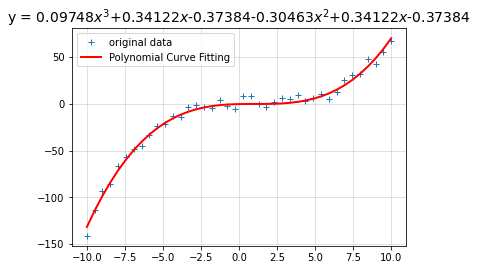

In [7]:
loopmax=1000
alpha=0.05
loss=[]
threshold=1e-7
for i in range(1000):
    y_hat=X.dot(weight)
    alpha=alpha*0.96
    gradient = X.T.dot(y_hat - y) / m
    weight = weight - 1 / np.sqrt((gradient ** 2).mean()) * gradient * alpha
    loss.append(((y_hat - y) ** 2).mean())
    new_J=(1/(2*m))*(y_hat-y)**2
    if np.abs(weight - weight_old).all() <= threshold:
            break
    else:
            weight_old = weight
w=weight
print(weight)
fitting_y=X.dot(weight)
_w=[]
for i in range(len(w)):
     _w.append(round(float(w.item(i)), 5))
title = 'y = '
w = list(map(str, _w))
for i in range(len(w)):
    if i != 0 and float(w[i]) > 0:
        w[i] = '+' + w[i]
for i in range(len(w) - 2):
        title = title + w[i] + '$x^{}$'.format(len(w) - i - 1)
        title = title + w[-2] + '$x$'
        title = title + w[-1]
plt.plot(x,y, '+', label='original data')
plt.plot(x,fitting_y, 'r-', lw=2, label='Polynomial Curve Fitting')
plt.grid(alpha=0.5)
plt.title(title,fontdict={'fontsize': 14})
plt.legend()
plt.show()